Если интересно продолжать работать с NLP, то можно посмотреть вот это:

https://neurohive.io/ru/novosti/bert-ot-google-ai-open-source-model-obrabotki-estestvennogo-jazyka/

https://proglib.io/p/fun-nlp/

https://github.com/google-research/bert (можно попробовать обучить на русском языке на этом датасете: https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/QA/premise_question_answer5.txt)

# Введение

Сегодня отойдем от темы обработки естественного языка и поговорим о картинках и видео. Сначала расскажу, что можно делать и каким образом, а потом попробуем что-нибудь пораспознавать.

С изображениями можно решать несколько классов задач (некоторые из них): 

Распознавание изображений

Трекинг объектов

Сегментация изображений

На сегодняшний день существует куча интересных проектов, в которых фигурируют картинки и deep learning. Допустим, вы можете составить 3д-модель головы определенного человека по всего нескольким фотографиям (https://neurohive.io/ru/papers/rekonstrukcija-3d-modeli-golovy/), научиться по видео определять говорящего и убирать звук на фоне (https://neurohive.io/ru/novosti/kontroliruemoe-obuchenie-rnn/; https://github.com/google/uis-rnn). А можно даже задетектить рак (https://neurohive.io/ru/novosti/nejronnaja-set-ot-google-ai-vyjavljaet-rakovye-metastazy-s-tochnostju-99/).

# Теория

Самое основное, о чем тут можно говорить, это сверточые нейронные сети. Их применяют почти везде, где требуется что-то сделать с картинками.

Итак, рассмотрим схему сверточной нейронной сети:
![alt text](http://www.trivialorwrong.com/assets/laws-sausages-and-convnets_files/convnet-example.png)

Это более-менее типичный пример сверточной нейронной сети. Здесь мы видим несколько надписей:

1. Conv
2. Maxpool
3. Non-linear
4. Fully-connected

Получается, что в CNN есть. как минимум 4 вида слоев:

1. Сверточный (Convolution)
2. Подвыборка (Subsampling)
3. ReLu-слой
4. Обычный, полносвязный слой



И суть следующая: вы подаете на входы сети изображение и оно проходит через различные комбинации этих четырех слоев, а на выходе вы получаете класс этого изображения

## Сверточный слой

Чтобы понять, что такое сверточный слой, нам нужно понять, что такое **свертка изображения с матрицей** (или свертка матриц).

Так вот, грубо говоря, у нас есть матрица свертки размером 3 на 3 (то есть просто каких-то 9 чисел, которые мы взяли из головы) и есть входное изображение. И мы берем нашу матрицу свертки и "сворачиваем" ее со всеми кусочками нашего входного изображения размером 3 на 3.![alt text](https://mlnotebook.github.io/img/CNN/convZeros.png)
То есть мы берем нашу матрицу 3 на 3 и накладываем ее на все возможные участки картинки. После каждого накладывания мы получаем одно какое-то число и записываем его в отдельный массив. Этот отдельный массив будем называть **картой признака** (или **feature map**) Карта признака на картинке выше - синяя матрица, если че.

![alt text](https://hsto.org/webt/o0/zh/rz/o0zhrzr_ml2tgsfmvl-mcrxjmbq.gif)

Также важно отметить, что после операции свертки ее результаты подаются на вход функции активации (обычно это ReLU, про ReLU все будет рассказано ниже)

Попробуем теперь что-то свернуть... Для этого скачаем картинку из интернета

In [1]:
!wget https://cdn.forums.klei.com/monthly_07_2013/post-17183-13764597435168_thumb.jpg

--2018-11-25 09:32:36--  https://cdn.forums.klei.com/monthly_07_2013/post-17183-13764597435168_thumb.jpg
Resolving cdn.forums.klei.com (cdn.forums.klei.com)... 143.204.192.46, 143.204.192.90, 143.204.192.109, ...
Connecting to cdn.forums.klei.com (cdn.forums.klei.com)|143.204.192.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8924 (8.7K) [image/jpeg]
Saving to: ‘post-17183-13764597435168_thumb.jpg’

post-17183-13764597 100%[===================>]   8.71K  --.-KB/s    in 0s      

2018-11-25 09:32:36 (19.3 MB/s) - ‘post-17183-13764597435168_thumb.jpg’ saved [8924/8924]



In [2]:
!ls

post-17183-13764597435168_thumb.jpg  sample_data


И отобразим ее на экране нашего notebook.

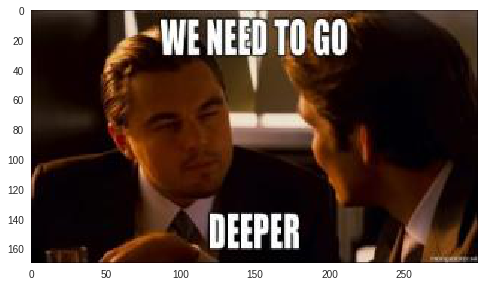

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('post-17183-13764597435168_thumb.jpg') # читаем картинку
plt.grid(None) # убираем сетку с изображения
imgplot = plt.imshow(img) # отображаем

Разделим нашу картинку по каналам, чтобы получить из нее три матрицы (если че, то картинка имеет три цветовых канала: RGB, то есть картинка  - это недвумерная штука, а трехмерная). Мы возьмем каждую составляющую и свернем ее с отдельной матрицей свертки. То есть 

channel_R \* mtr_R,

channel_G \* mtr_G,

channel_B \* mtr_B, 

"*" - операция свертки

А после свертки объединим наши карты признаков в одно изображение.

In [0]:
img_chnls = np.split(img, 3, axis=2)

Матрицы свертки для каждой составляющей

In [0]:
mtx_R = [[1, 0, 0],
        [0, 2, 0],
        [0, 0, 1]]

mtx_G = [[0, 1, 0],
        [0, 2, 0],
        [0, 1, 0]]

mtx_B = [[0, 0, 0],
        [1, 2, 1],
        [0, 0, 0]]

Функция свертки

In [0]:
def conv(img, mtx):
    res = np.ndarray(img.shape)
    img = np.pad(img, pad_width=1, mode='constant', constant_values=0) # добавляем рамку из нулей вокруг изображения, чтобы свертка не уменьшала его
    for y in range(1, img.shape[0]-1):
        for x in range(1, img.shape[1]-1):
            roi = img[y-1:y+2, x-1:x+2]
            res[y-1, x-1] = np.multiply(roi, mtx).sum() # перемножаем элементы первой и второй матрицы соответсвенно и находим сумму результатов
            
    return res
                    

Сворачиваем... 

Замечание. Обратите внимание, что за красную составляющую мы приняли последний канал картинки, а не первый (то есть у нас картинка BGR, а не RGB)


In [0]:
fm_R = conv(img_chnls[2], mtx_R)
fm_G = conv(img_chnls[1], mtx_G)
fm_B = conv(img_chnls[0], mtx_B)

In [8]:
img.shape

(170, 300, 3)

Нормализуем получившиеся фичермапы (так как после свертки значения становятся больше 255) и объединяем в картинку

In [0]:
fm_R = np.divide(fm_R, fm_R.max())
fm_G = np.divide(fm_G, fm_G.max())
fm_B = np.divide(fm_B, fm_B.max())

conv_img = np.ndarray(img.shape)
conv_img[:,:,0] = fm_B[:,:,0]
conv_img[:,:,1] = fm_G[:,:,0]
conv_img[:,:,2] = fm_R[:,:,0]

Рисуем

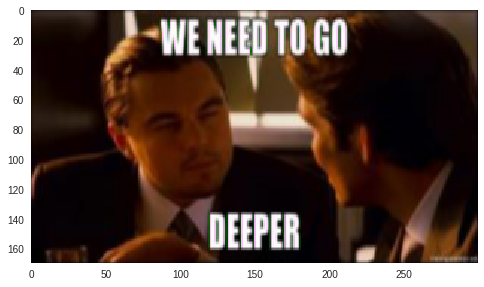

In [10]:
plt.grid(None)
imgplot = plt.imshow(conv_img) # отображаем

Не знаю заметили ли вы или нет, но когда мы нормализовали наши фичемапы, то мы привели их только к значениям от 0 до 1. Хотя стоило бы привести их к виду от 0 до 255. Но у matplotlib есть такая особенность, что она умеет отображать картинки, заданные вещественными числами от 0 до 1. Вот, поэтому в этом нет необхоимости.

Ну и вот. Получили размытое изображение (причем размыли по-разному на разных каналах)

## Подвыборка


Следующий тип слоя - это подвыборка (pooling). Существует несколько видов подвыборки, в частности это max pooling и average pooling. В обоих случаях мы берем и разбиваем наше изображение на квадратные участки (2х2, 3х3 и тд), то есть делаем сетку из нашего изображения. И суть подвыборки заключается в том, чтобы от каждой ячейки нашей сетки осталось лишь одно число. В случае с max pooling мы просто берем максимальный пиксель (самый яркий) из каждой ячейки сетки, а в случае с average pooling берем не максимальное, а среднее.

Max Pooling:

![alt text](https://hsto.org/getpro/habr/post_images/4bc/ea0/29d/4bcea029de3730862ab8721e47d9bc25.png)

А теперь давайте возьмем результаты свертки нашей картинки и применим к ним max pooling

In [0]:
def maxpooling_2x2(fmap):
    res_shape = (fmap.shape[0] // 2, fmap.shape[1] // 2) # изображение уменьшается соответственно размеру матрицы для пулинга
    res = np.ndarray(res_shape)
    for y in range(0, fmap.shape[0], 2):
        for x in range(0, fmap.shape[1], 2):
            res[y//2, x//2] = fmap[y:y+2, x:x+2].max()
            
    return res

In [0]:
pooled_R = maxpooling_2x2(fm_R)
pooled_G = maxpooling_2x2(fm_G)
pooled_B = maxpooling_2x2(fm_B)

In [0]:
pool_img = np.ndarray((img.shape[0] // 2, img.shape[1] // 2, 3))
pool_img[:,:,0] = pooled_B
pool_img[:,:,1] = pooled_G
pool_img[:,:,2] = pooled_R

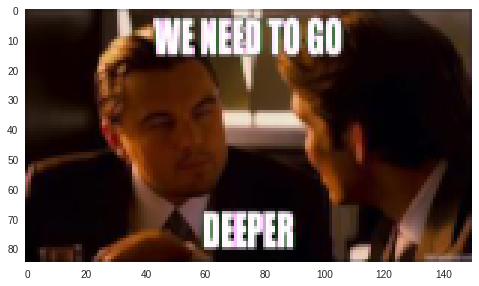

In [14]:
plt.grid(None)
imgplot = plt.imshow(pool_img) # отображаем

Как-то так. С подвыборками все. Теперь поговорим про relu-слои

## ReLU-слой

По своей сути является обычным полносвязным слоем. Просто функцией активации является Rectified Linear Unit. А само ReLU - это не сложно, а очень даже просто. Вот формула:

![alt text](https://hsto.org/webt/tq/by/ht/tqbyhtxpyotkoeqrn6aygpmne2m.png)

Подобные функции активации стали использовать сравнительно недавно, так как их использование убирает недостатки более классических методов активации нейронов. 

Вот сравнение ReLU с гиперболическим тангенсом:

![alt text](https://hsto.org/webt/ux/rx/mt/uxrxmtrbzdniqbytle0ps2_jhbs.png)

(На всякий случай, чтобы было понятнее: Про производные идет речь, потому что значения производных используются при обучении нейронных сетей с помощью алгоритма обратного распространения ошибки)

Дальше перейдем к практике)

# Распознавание объектов на изображениях из набора данных CIFAR-10

Пример из курса ["Программирование глубоких нейронных сетей на Python"](https://www.asozykin.ru/courses/nnpython).

[Вот этот урок](https://www.asozykin.ru/courses/nnpython-lab2)

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [15]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

Using TensorFlow backend.


In [0]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [17]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 20s 0us/step


**Просмотр примеров данных**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


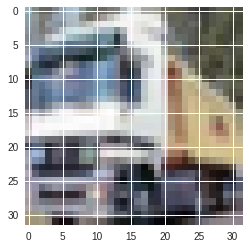

Номер класса: [9]
Тип объекта: грузовик


In [18]:
n = 1
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [0]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

**Компилируем модель**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [24]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 15s - loss: 1.6400 - acc: 0.3966 - val_loss: 1.3101 - val_acc: 0.5286
Epoch 2/25
 - 10s - loss: 1.2286 - acc: 0.5569 - val_loss: 1.0441 - val_acc: 0.6390
Epoch 3/25
 - 10s - loss: 1.0525 - acc: 0.6260 - val_loss: 0.9476 - val_acc: 0.6776
Epoch 4/25
 - 10s - loss: 0.9490 - acc: 0.6651 - val_loss: 0.8289 - val_acc: 0.7120
Epoch 5/25
 - 10s - loss: 0.8747 - acc: 0.6914 - val_loss: 0.7851 - val_acc: 0.7278
Epoch 6/25
 - 10s - loss: 0.8053 - acc: 0.7152 - val_loss: 0.7530 - val_acc: 0.7412
Epoch 7/25
 - 10s - loss: 0.7555 - acc: 0.7352 - val_loss: 0.6941 - val_acc: 0.7676
Epoch 8/25
 - 10s - loss: 0.7023 - acc: 0.7549 - val_loss: 0.6893 - val_acc: 0.7612
Epoch 9/25
 - 10s - loss: 0.6600 - acc: 0.7664 - val_loss: 0.6923 - val_acc: 0.7588
Epoch 10/25
 - 10s - loss: 0.6225 - acc: 0.7803 - val_loss: 0.6477 - val_acc: 0.7794
Epoch 11/25
 - 10s - loss: 0.5918 - acc: 0.7894 - val_loss: 0.6362 - val_acc: 0.7834
Epoch 12/25
 - 10s - loss

## Оцениваем качетсво обучения сети

In [25]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 78.96%


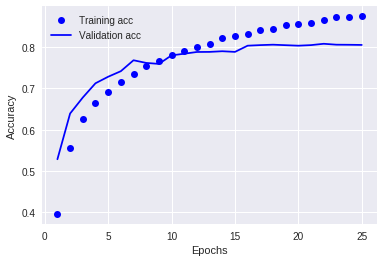

In [26]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [0]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [28]:
!ls

cifar10_model.h5    post-17183-13764597435168_thumb.jpg
cifar10_model.json  sample_data


In [0]:
from google.colab import files

In [0]:
files.download("cifar10_model.json")

In [0]:
files.download("cifar10_model.h5")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


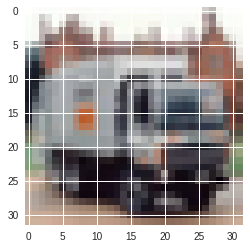

In [32]:
index=11
plt.imshow(toimage(X_test[index]))
plt.show()

**Преобразование тестового изображения**

In [0]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [35]:
print(prediction)

[[1.7203485e-14 9.4384422e-06 3.8284979e-18 5.7043394e-17 1.5062299e-21
  9.6108500e-21 3.1823456e-21 1.5374374e-22 3.1707827e-15 9.9999058e-01]]


**Преобразуем результаты из формата one hot encoding**

In [36]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


**Печатаем правильный ответ**

In [37]:
print(classes[y_test[index][0]])

грузовик


## Распознаем дополнительное изображение

In [38]:
from google.colab import files

files.upload()

Saving plane.jpg to plane.jpg


{'plane.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00<CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 100\n\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x00\x80\x00\xa0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00

Проверяем загрузку файлов

In [39]:
!ls

cifar10_model.h5    plane.jpg				 sample_data
cifar10_model.json  post-17183-13764597435168_thumb.jpg


**Смотрим загруженную картинку**

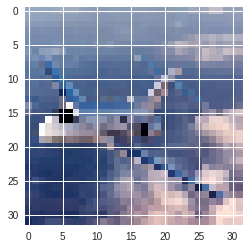

In [40]:
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [42]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет


# Домашнее задание

Попробуйте подключить камеру (с этим вам поможет openCV) 

Или сделайте отправку картинки из телеграм-бота (с этим вам поможет Вася)

Обучите сверточную нейронную сеть на датасете mnist.

И обработайте нейронкой поступившую картинку. Выдайте результат в бота или на экран.

Общий смысл такой: берете и пишете на бумажке число, фоткаете, посылаете в бота, получаете результат.

(как вариант можно попробовать ряд чисел распознавать, тогда нужно будет делить картинку на несколько частей, либо идти по картинке неким "распознающим окошком", то есть картинку внутри этого "окошка" подавать на вход CNN)


# Доп материалы

https://neurohive.io/ru/machine-learning-cases/raspoznavanie-lica-facenet/ (Туториал по распознавнаванию лиц)

https://www.asozykin.ru/deep_learning/2017/08/11/Foto-Verification-with-Dlib.html (Еще один)

https://neurohive.io/ru/vidy-nejrosetej/alexnet-svjortochnaja-nejronnaja-set-dlja-raspoznavanija-izobrazhenij/ (Разбор той самой сверточной сети, победа в соревновании которой вывело в 2012 году компьютерное зрение в новую эру)

https://www.pyimagesearch.com/ (здесь можно найти целый мильон крутых уроков по компьютерному зрению на Питоне. В основном используются библиотеки opencv и dlib)

https://www.asozykin.ru/deep_learning/2017/08/31/Math-of-Deep-Learning.html (Если вдруг хотите еще окунуться в математику нейронных сетей)

https://habr.com/post/348000/ (Цикл статей про сверточные сети на хабре, советую уделить отдельное внимание второй части)